In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_excel("processed_data.xlsx")

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoded_df = pd.get_dummies(data, columns=['Age', 'YearsAtCompany'])

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical variable
encoded_time_spent = label_encoder.fit_transform(encoded_df['Avg Time Spent(Mins)'])

# Replace the original column with the encoded values
encoded_df['Avg Time Spent(Mins)'] = encoded_time_spent

In [ ]:
# Perform one-hot encoding for the categorical variable
encoded_df = pd.get_dummies(encoded_df, columns=['Avg Time Spent(Mins)'])

In [64]:
encoded_df

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
0,0,2,2,-0.39,2,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
1,1,1,1,0.10,1,1,2,0,1,6,...,False,True,False,False,False,False,True,False,False,False
2,0,1,1,0.96,4,4,3,1,4,7,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,-0.89,5,1,4,1,3,1,...,False,False,False,True,False,False,False,False,True,False
4,0,2,1,0.10,1,3,5,1,1,7,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0,2,2,-0.64,3,4,4405,0,2,1,...,False,False,False,True,False,True,False,False,False,False
4296,0,2,1,-0.52,4,3,4406,0,1,6,...,False,True,False,False,False,True,False,False,False,False
4297,0,2,1,-0.89,4,3,4407,1,1,2,...,False,True,False,False,False,False,True,False,False,False
4298,0,2,1,1.95,2,1,4408,1,2,7,...,False,True,False,False,False,False,True,False,False,False


In [39]:
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train

,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,...,Age_Senior-level,YearsAtCompany_Apprentice,YearsAtCompany_Expert,YearsAtCompany_Journeyman,YearsAtCompany_Master,Avg Time Spent(Mins)_0,Avg Time Spent(Mins)_1,Avg Time Spent(Mins)_2,Avg Time Spent(Mins)_3,Avg Time Spent(Mins)_4
847,2,2,-0.39,3,2,877,0,3,8,1,...,False,False,False,False,True,True,False,False,False,False
3734,2,1,-0.89,3,3,3833,0,2,7,1,...,False,False,True,False,False,False,False,False,True,False
1833,2,1,1.95,2,1,1890,0,2,7,1,...,False,False,True,False,False,True,False,False,False,False
2787,2,2,-1.01,2,1,2867,1,1,3,0,...,True,True,False,False,False,False,False,True,False,False
3245,0,1,-1.01,5,3,3335,0,2,6,2,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,2,1,-0.39,3,3,3539,1,5,5,2,...,False,True,False,False,False,False,False,True,False,False
466,2,2,2.20,3,3,485,1,2,7,1,...,False,False,False,False,True,False,False,True,False,False
3092,2,1,-0.89,2,1,3180,1,1,2,1,...,False,True,False,False,False,False,False,False,True,False
3772,2,1,-1.01,2,3,3871,1,2,8,0,...,False,False,False,True,False,True,False,False,False,False


In [43]:
ann = tf.keras.models.Sequential()

In [44]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [45]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [46]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [47]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [48]:
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6528 - loss: 84.2658
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: 11.5198
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7413 - loss: 11.6518
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 10.7365
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7651 - loss: 6.7209
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7291 - loss: 6.2152
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 9.4934
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7523 - loss: 6.6189
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 6.9076
Epoch 10/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 6.2485
Epoch 11/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 10.0651
Epoch 12/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [50]:
encoded_df.to_excel('processed_data_final.xlsx',index=False)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [52]:
predictions = ann.predict(X_test)
predictions_binary = (predictions > 0.5)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [53]:
y_test_binary = np.array(y_test)  # Convert to numpy array for consistency
y_test_binary = y_test_binary.astype(int)

In [54]:
# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_binary, predictions_binary)

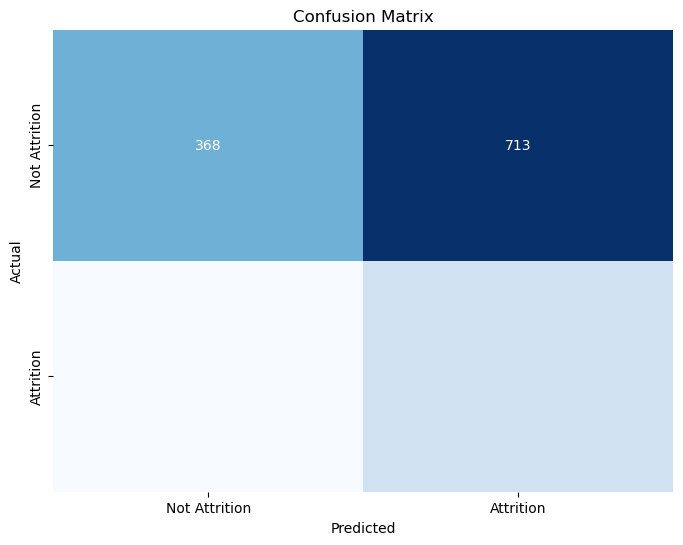

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Attrition", "Attrition"],
            yticklabels=["Not Attrition", "Attrition"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
from sklearn.metrics import roc_curve, auc

In [57]:
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions)

In [58]:
roc_auc = auc(fpr, tpr)

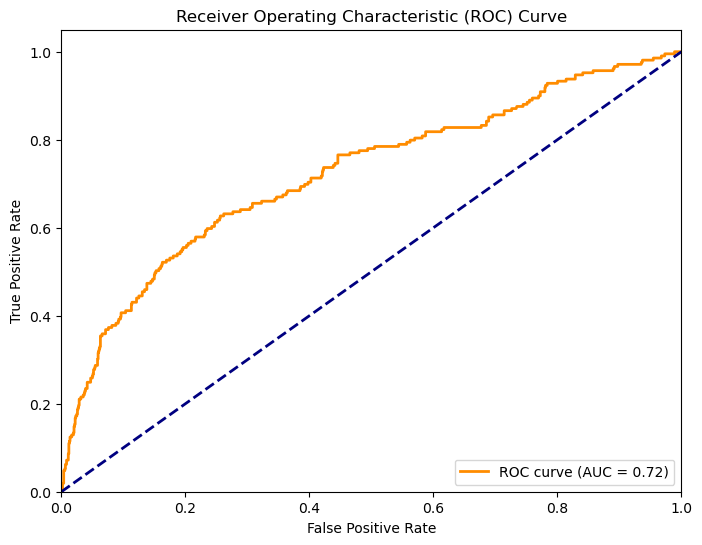

In [59]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [61]:
precision = precision_score(y_test_binary, predictions_binary)
recall = recall_score(y_test_binary, predictions_binary)
accuracy = accuracy_score(y_test_binary, predictions_binary)

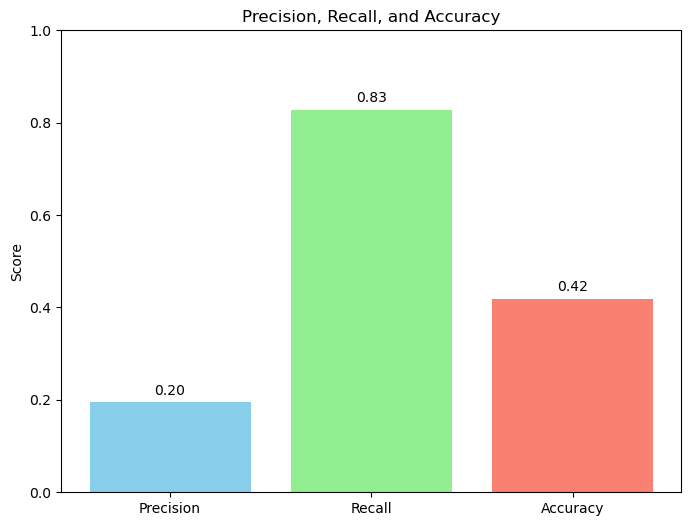

In [63]:
plt.figure(figsize=(8, 6))
metrics = ['Precision', 'Recall', 'Accuracy']
values = [precision, recall, accuracy]
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])

for i, value in enumerate(values):
    plt.text(i, value + 0.01, '{:.2f}'.format(value), ha='center', va='bottom')

plt.title('Precision, Recall, and Accuracy')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()